In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import librosa
import IPython.display as ipd

import ipywidgets as widgets

import string
import random
import warnings
warnings.filterwarnings("ignore")

## Data
Files used for exploratory data analysis:
* speech_dataset_no_meld.csv - metadata for audio files
* dataset - training data consisting of short recordings 

In [20]:
df = pd.read_csv("speech_dataset_no_meld.csv")
df.head()

,Id,Dataset,Filepath,Filename,Ext,Speaker,Text,Gender,Age,Emotion
0,0,CREMA-D,./dataset/crema-d\AudioWAV\1001_DFA_ANG_XX.wav,1001_DFA_ANG_XX.wav,.wav,Crema_1001,Don't forget a jacket,Male,51.0,Anger
1,1,CREMA-D,./dataset/crema-d\AudioWAV\1001_DFA_DIS_XX.wav,1001_DFA_DIS_XX.wav,.wav,Crema_1001,Don't forget a jacket,Male,51.0,Disgust
2,2,CREMA-D,./dataset/crema-d\AudioWAV\1001_DFA_FEA_XX.wav,1001_DFA_FEA_XX.wav,.wav,Crema_1001,Don't forget a jacket,Male,51.0,Fear
3,3,CREMA-D,./dataset/crema-d\AudioWAV\1001_DFA_HAP_XX.wav,1001_DFA_HAP_XX.wav,.wav,Crema_1001,Don't forget a jacket,Male,51.0,Happy
4,4,CREMA-D,./dataset/crema-d\AudioWAV\1001_DFA_NEU_XX.wav,1001_DFA_NEU_XX.wav,.wav,Crema_1001,Don't forget a jacket,Male,51.0,Neutral


## Source datasets

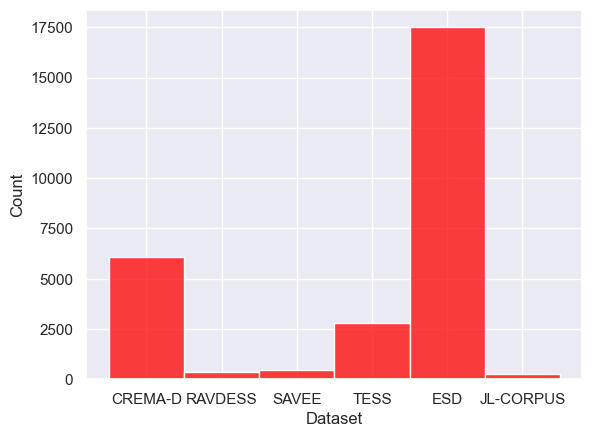

In [21]:
sns.set(style="darkgrid")
sns.histplot(data=df, x="Dataset", color="red")
plt.show()

### CREMA-D

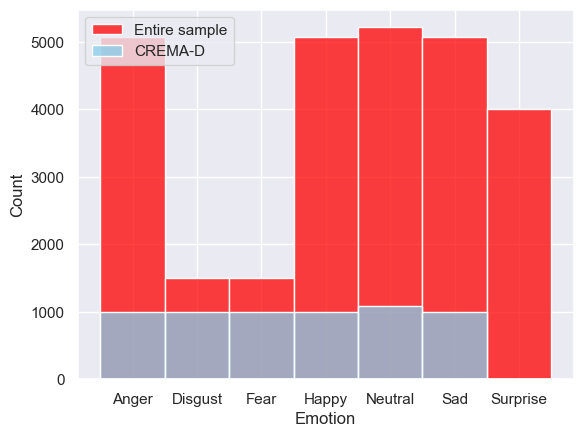

In [22]:
sns.histplot(data=df, x="Emotion", color="red", label="Entire sample")
sns.histplot(data=df[df["Dataset"]=="CREMA-D"], x="Emotion", color="skyblue", label="CREMA-D")
plt.legend() 
plt.show()

### TESS

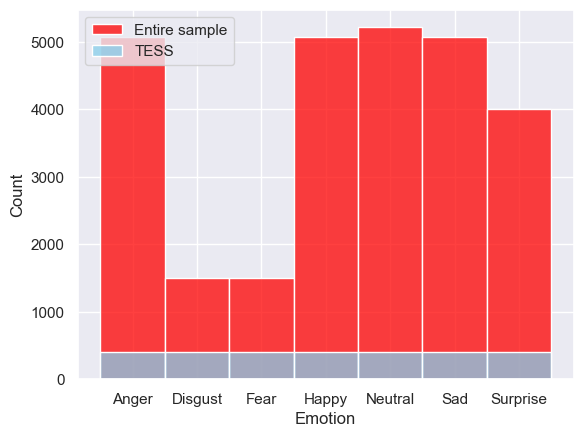

In [23]:
sns.histplot(data=df, x="Emotion", color="red", label="Entire sample")
sns.histplot(data=df[df["Dataset"]=="TESS"], x="Emotion", color="skyblue", label="TESS")
plt.legend() 
plt.show()

### ESD

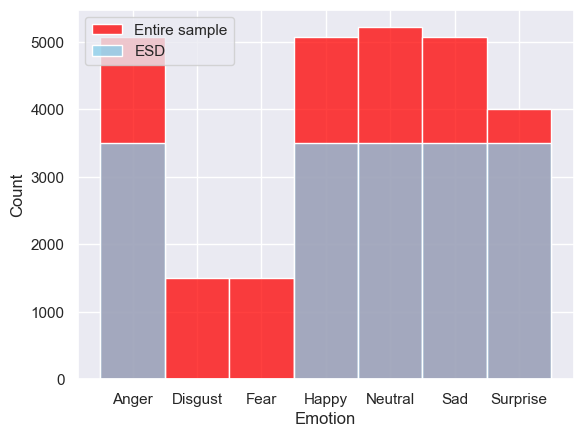

In [24]:
sns.histplot(data=df, x="Emotion", color="red", label="Entire sample")
sns.histplot(data=df[df["Dataset"]=="ESD"], x="Emotion", color="skyblue", label="ESD")
plt.legend() 
plt.show()

### Distribution of number of words

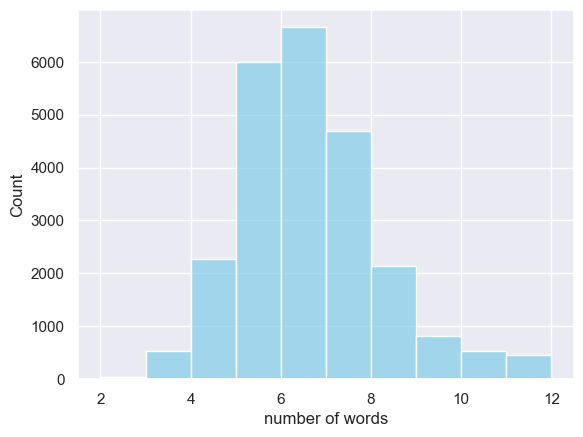

Most of the recordings have only one sentence (99%). However 150 of them have two. With following examples:
* And the next day. Nurse will be released.
* And what are doves. And what are doves.
* I'd shoot myself. 
* I'd shoot myself. a pause.


In [25]:
df["number of words"] = df.Text.map(lambda x:len(str(x).split(" ")) if len(str(x))>3 else None)
df["number of sentences"] = df.Text.map(lambda x:len(str(x).split(". ")) if len(str(x))>3 else None)
sns.histplot(data=df, x="number of words", color="skyblue", binwidth=1)
plt.show()
print(f"Most of the recordings have only one sentence ({round((np.sum(df['number of sentences']==1)/(np.sum(df['number of sentences']==2)+np.sum(df['number of sentences']==1)))*100)}%). However {np.sum(df['number of sentences']==2)} of them have two. With following examples:")

unique = np.unique(df[df['number of sentences']>1].Text)
for i in range(len(unique)):
    print(f"* {unique[i]}")

### Must common phrases

In [26]:
val_counts = df.Text.value_counts()
for i in range(np.sum(val_counts==np.max(val_counts))):
    print(val_counts.index[i])

Don't forget a jacket
I would like a new alarm clock
The airplane is almost full
I wonder what this is about
The surface is slick
I'm on my way to the meeting


### Recording duration

In [37]:
def get_duration(x):
    samples, sample_rate = librosa.load(x)
    duration_seconds = librosa.get_duration(y=samples, sr=sample_rate)
    return duration_seconds

df["duration"] = [get_duration(x) for x in df.Filepath]

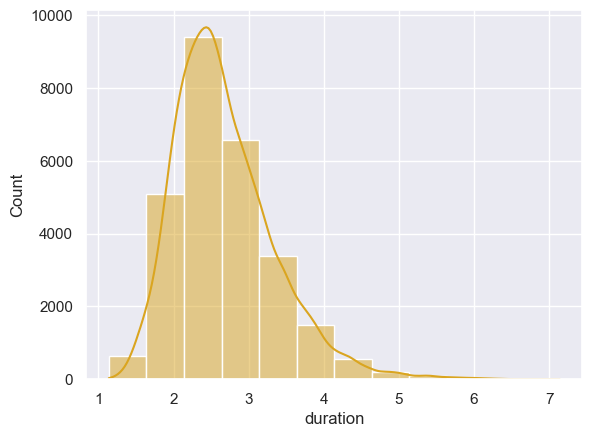

In [43]:
sns.histplot(data=df, x="duration", color="goldenrod", binwidth=1/2, kde=True)
plt.show()

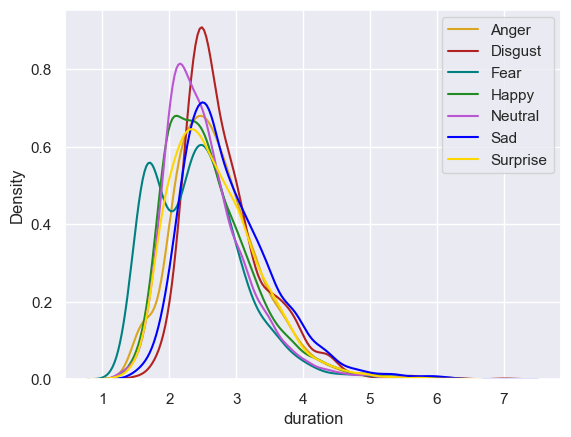

In [55]:
colors = ["goldenrod", "firebrick", "teal", "forestgreen", "mediumorchid", "blue", "gold"]
emotions = np.unique(df.Emotion)
for i in range(len(emotions)):
    sns.kdeplot(data=df[df.Emotion==emotions[i]], x="duration", color=colors[i], label=emotions[i])
    
plt.legend()
plt.show()

## Speakers

In [28]:
print(f"Number of speakers: {len(np.unique(df.Speaker))}")

Number of speakers: 135


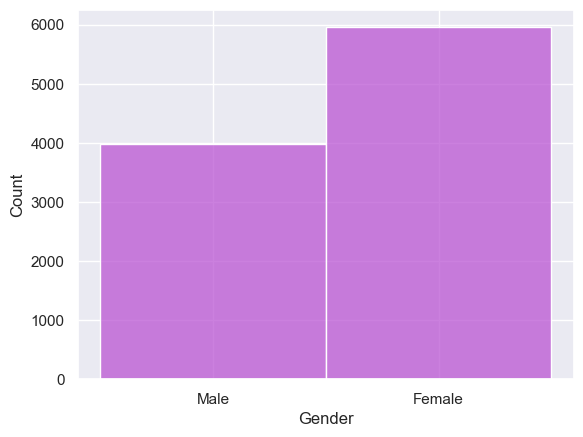

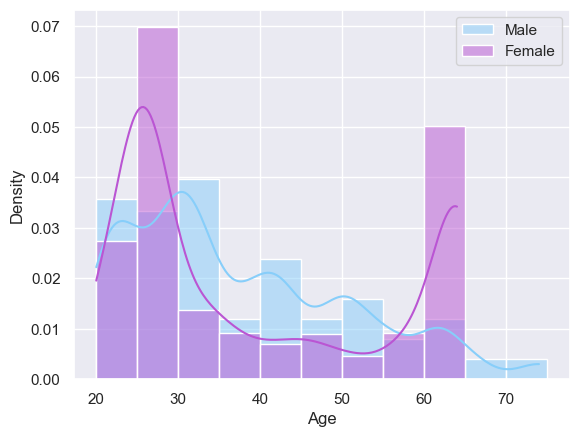

In [29]:
sns.histplot(data=df, x="Gender", color="mediumorchid", binwidth=1)
plt.show()


sns.histplot(data=df[df.Gender=="Male"], x="Age", color="lightskyblue", label="Male", kde=True, binwidth=5, stat="density")
sns.histplot(data=df[df.Gender=="Female"], x="Age", color="mediumorchid", label="Female", kde=True, binwidth=5, stat="density")

plt.legend() 
plt.show()

### Distribution of classes per gender

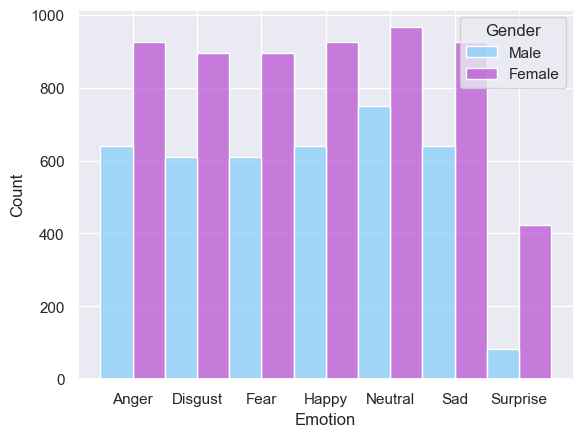

In [30]:
sns.histplot(data=df, x="Emotion", color="mediumorchid", label="Female", multiple="dodge", hue="Gender", palette={"Female": "mediumorchid", "Male": "lightskyblue"})

plt.show()

Surprise might be problematic as model might be biased aand preffer assigning this emotion only to recordings of female speakers.

# Audio files

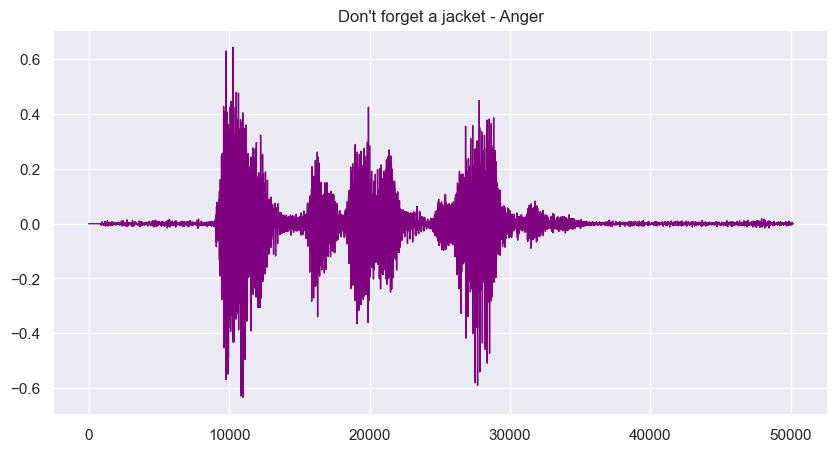

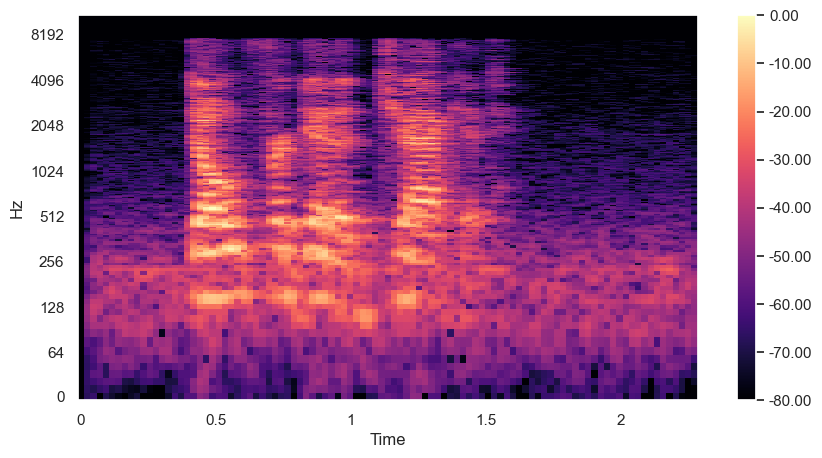

In [31]:
i=0

# Loadinng file
samples, sample_rate = librosa.load(df.Filepath[i])

# Raw audio vizualisation
pd.Series(samples).plot(figsize=(10, 5),
                        lw=1,
                        title=f'{df.Text[i]} - {df.Emotion[i]}',
                        color="purple")
plt.show()

# Spectrogram
D = librosa.stft(samples)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)

fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

# Recording
ipd.Audio(df.Filepath[i])

### Instead of using standard spectrogram we may also consider Mel Speectrogram

We are more sensitive to differences between lower frequencies than higher frequencies.

The Mel Scale was developed to take this into account by conducting experiments with a large number of listeners. It is a scale of pitches, such that each unit is judged by listeners to be equal in pitch distance from the next.

A Mel Spectrogram makes two important changes relative to a regular Spectrogram that plots Frequency vs Time.

* It uses the Mel Scale instead of Frequency on the y-axis.
* It uses the Decibel Scale instead of Amplitude to indicate colors.

For deep learning models, we usually use this rather than a simple Spectrogram. 

Source: https://www.kaggle.com/code/soheiltehranipour/speech-eda-librosa

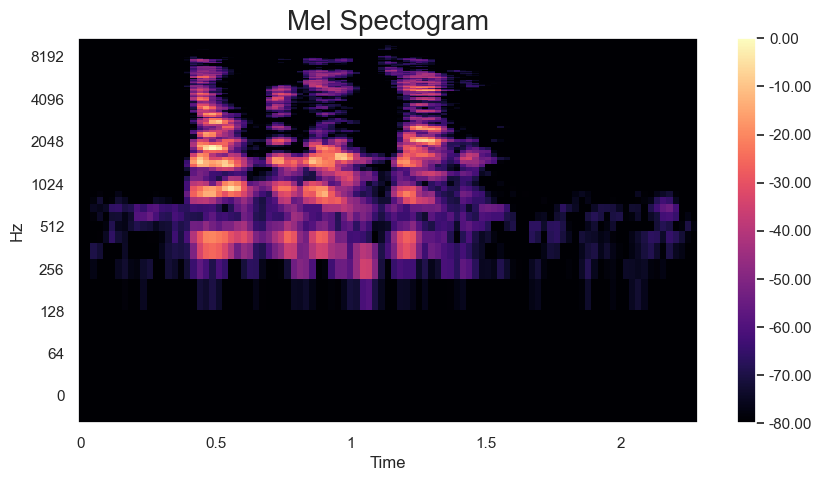

In [32]:
S = librosa.feature.melspectrogram(y=samples,
                                   sr=sample_rate)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

## Emotion analysis

#### We will visualize one of most common phrases for each emotion

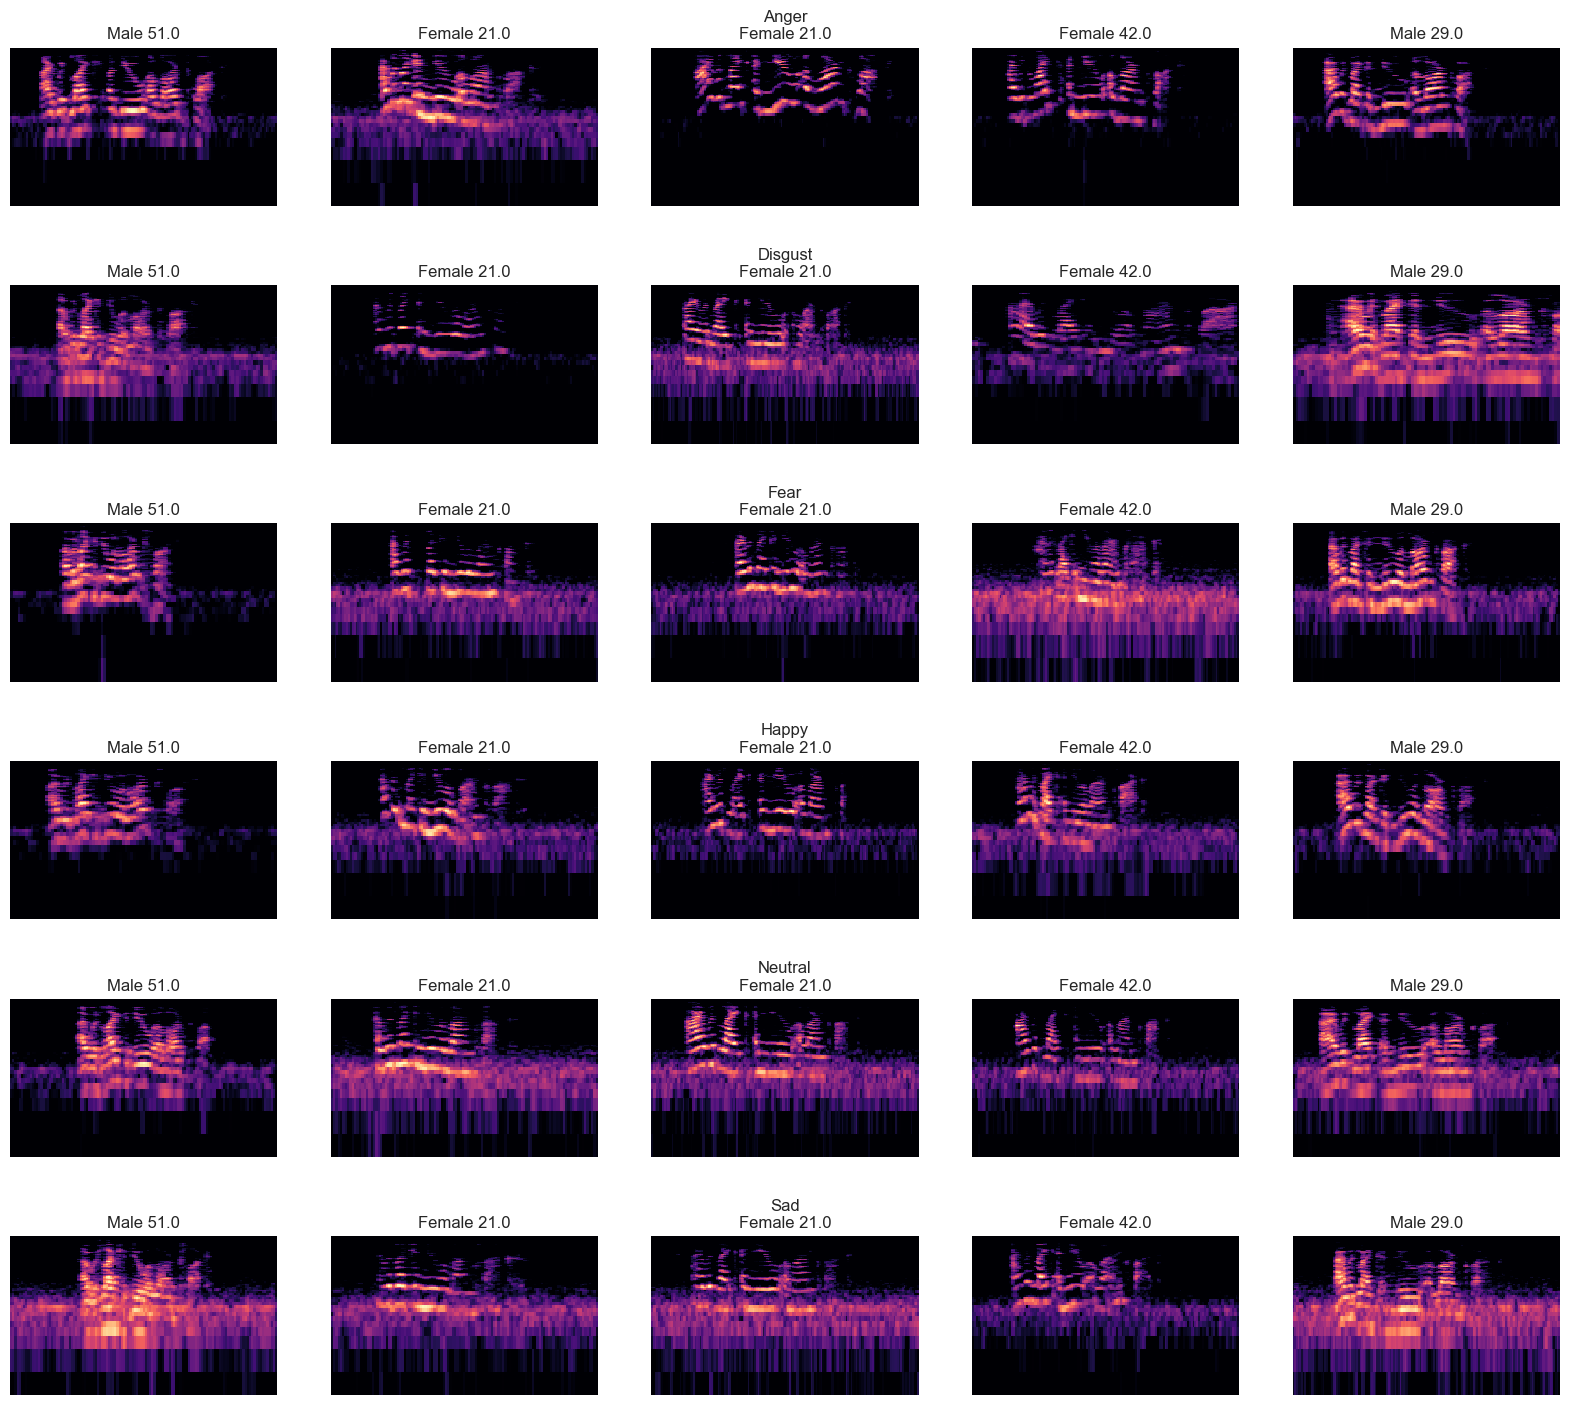

In [33]:
phrase = "I would like a new alarm clock"

df_phrase = df[df.Text == phrase]



ncols=5
fig, ax = plt.subplots(nrows=len(emotions), ncols=ncols ,figsize=(20, 17.5))

for i in range(len(emotions)):
    df_emotion = df_phrase[df_phrase.Emotion == emotions[i]]
    df_emotion.reset_index(inplace = True)
    for j in range(ncols):
        samples, sample_rate = librosa.load(df_emotion.Filepath[j])
        S = librosa.feature.melspectrogram(y=samples,
                                        sr=sample_rate)
        S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

        
        # Plot the mel spectogram
        img = librosa.display.specshow(S_db_mel,
                                    x_axis='time',
                                    y_axis='log',ax=ax[i,j]
                                    )

        ax[i,j].axis('off')

        title = emotions[i] + "\n" if j == 2 else ""
        title += df_emotion.Gender[j] + " " + str(df_emotion.Age[j])
        ax[i,j].set_title(title) 
plt.subplots_adjust(hspace=0.5)
plt.show()

### Let's compare the recordings made by 51 yo male

In [34]:
df_speaker = df_phrase[df_phrase.Speaker == df_phrase.Speaker.values[0]]
df_speaker.reset_index(inplace=True)
for i in range(df_speaker.shape[0]):
    print(df_speaker.Emotion[i])
    display(ipd.Audio(df_speaker.Filepath[i]))


Anger


Disgust


Fear


Happy


Neutral


Sad


I don't hear any emotions

#### 21 yo Female

In [35]:
df_speaker2 = df_phrase[df_phrase.Speaker == np.unique(df_phrase.Speaker)[2]]
df_speaker2.reset_index(inplace=True)
for i in range(df_speaker2.shape[0]):
    print(df_speaker2.Emotion[i])
    display(ipd.Audio(df_speaker2.Filepath[i]))
    

Anger


Disgust


Fear


Happy


Neutral


Sad


Better

# QUIZ

In [59]:
letter_to_index = {letter: index for index, letter in enumerate(string.ascii_lowercase)}


data = df
question = 'What emotion do you hear?\n'
for i in range(len(emotions)):
    question += string.ascii_lowercase[i] + ") "
    question += emotions[i]
    question += "\n"
    
    
# Function to display audio and ask question
def play_audio_and_ask_question(file_path, question):
    ipd.display(ipd.Audio(file_path, autoplay=True))
    answer_widget = widgets.Text(placeholder='Your answer')
    ipd.display(widgets.VBox([widgets.Label(question), answer_widget]))
    return answer_widget

# Function to grade answers
def grade_answers(indexes, answers):
    num_correct = 0
    for i, answer in zip(indexes, answers):
        if data.Emotion[i] == emotions[letter_to_index[answer.value]]:
            num_correct += 1
    return num_correct

# Main quiz function
def run_quiz(df):
    file_paths = data.Filepath.tolist()
    indexes = random.sample(list(range(len(file_paths))),5)
    answers = [play_audio_and_ask_question(file_paths[i], question) for i in indexes]
    submit_button = widgets.Button(description='Submit')
    display(submit_button)
    submit_button.on_click(lambda _: print(f'Number of correct answers: {grade_answers(indexes, answers)}'))

# Run the quiz
run_quiz(df)

Button(description='Submit', style=ButtonStyle())